In [ ]:
from function import crcbgenqcsig, normsig4psd, statgaussnoisegen, innerprod_psd, glrtqcsig
import numpy as np

# Load the data from the text file
data1 = np.loadtxt('.\data\data1.txt')
data2 = np.loadtxt('.\data\data2.txt')
data3 = np.loadtxt('.\data\data3.txt')

# Sampling frequency and parameters for the quadratic chirp signal
fs=1024
a1=10
a2=3
a3=3
nSamples= len(data1)
time_vec = np.arange(nSamples) / fs

# Calculate the positive frequencies and their corresponding PSD values of noise
def noisePSD(f):
    """Noise power spectral density function"""
    return ((f >= 100) & (f <= 300)) * (f - 100) * (300 - f) / 10000 + 1
dataLen = nSamples / fs
kNyq = nSamples // 2 + 1
posFreq = np.arange(kNyq) / dataLen
psdPosFreq = noisePSD(posFreq)

#Calculate the GLRT for each data set
glrt1=glrtqcsig(time_vec,data1, fs,psdPosFreq,[a1,a2,a3])
glrt2=glrtqcsig(time_vec,data2, fs,psdPosFreq,[a1,a2,a3])
glrt3=glrtqcsig(time_vec,data3, fs,psdPosFreq,[a1,a2,a3])

# Print the GLRT values
print('GLRT values:')
print(f'GLRT1: {glrt1}')
print(f'GLRT2: {glrt2}')
print(f'GLRT3: {glrt3}')


GLRT values:
GLRT1: 10.606877787463608
GLRT2: 71.41919754122405
GLRT3: 2.7811553007281953


Significance of GLRT1: 0.001
Significance of GLRT2: 0.0
Significance of GLRT3: 0.089


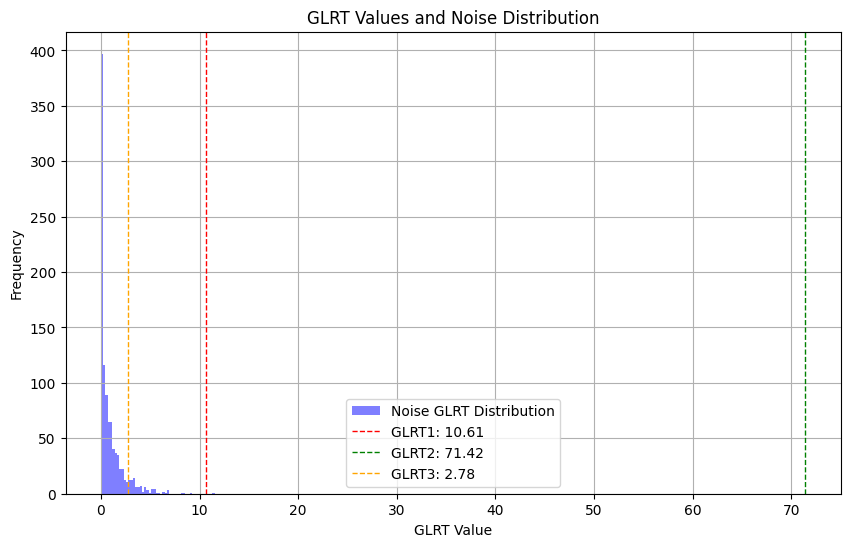

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

nRlz = 1000  # Number of realizations
glr_noise = np.zeros(nRlz)

# Calculate GLRT under null hypothesis (noise only)
for i in range(nRlz):
    
    # Generate noise realization
    noiseVec = statgaussnoisegen(nSamples, np.column_stack([posFreq, psdPosFreq]), 100, fs)
    
    # caculate GLRT for noise realization
    glr_noise[i]=glrtqcsig(time_vec,noiseVec, fs,psdPosFreq,[a1,a2,a3])

# The function of calculating significance of GLRT values
def significance(glr_noise, glrt_real):
    return np.sum(glr_noise > glrt_real) / len(glr_noise)

# Calculate significance for each GLRT value
significance1 = significance(glr_noise, glrt1)
significance2 = significance(glr_noise, glrt2)
significance3 = significance(glr_noise, glrt3)
print(f'Significance of GLRT1: {significance1}')
print(f'Significance of GLRT2: {significance2}')
print(f'Significance of GLRT3: {significance3}')

import matplotlib.pyplot as plt

# Plot the GLRT values and noise distribution
plt.figure(figsize=(10, 6))
plt.hist(glr_noise, bins=50, alpha=0.5, label='Noise GLRT Distribution', color='blue')
plt.axvline(glrt1, color='red', linestyle='dashed', linewidth=1, label=f'GLRT1: {glrt1:.2f}')
plt.axvline(glrt2, color='green', linestyle='dashed', linewidth=1, label=f'GLRT2: {glrt2:.2f}')
plt.axvline(glrt3, color='orange', linestyle='dashed', linewidth=1, label=f'GLRT3: {glrt3:.2f}')
plt.title('GLRT Values and Noise Distribution')
plt.xlabel('GLRT Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()
